# MNIST Basic Approach (Softmax)

In [23]:
#Importing Tensorflow
import tensorflow as tf

In [24]:
#Using tensorflow to download the MNIST Dataset
from tensorflow.examples.tutorials.mnist import input_data

In [25]:
#Grabbing the MNIST Dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [26]:
#Displaying the type
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [27]:
#Displaying the array of images
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
#Showing the number of training examples
mnist.train.num_examples

55000

In [29]:
#Showing the number of testing examples
mnist.test.num_examples

10000

In [30]:
#Importing the matplotlib to display the image correctly 
import matplotlib.pyplot as plt

In [31]:
#Grabbing one image and reshaping it into a 28 by 28 array
oneImage = mnist.train.images[100].reshape(28,28)

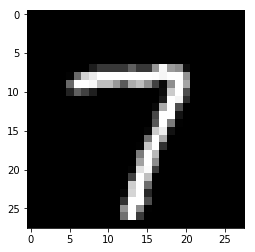

In [32]:
#Showing the image
plt.imshow(oneImage, cmap='gist_gray')

In [33]:
#Placeholder
x = tf.placeholder(tf.float32, shape=[None,784])

In [34]:
# Variables
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [35]:
#Create Graph Operations
y = tf.matmul(x,W) + b

In [36]:
#Placeholder for loss function
y_true = tf.placeholder(tf.float32, [None,10])

In [37]:
#Calculating the loss
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))

In [38]:
#Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [39]:
#Initialize Global Variables
init = tf.global_variables_initializer()

In [40]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for _ in range(1000):
        
        batch_x, batch_y = mnist.train.next_batch(100)
        
        sess.run(train, feed_dict={x:batch_x, y_true:batch_y})
    
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    print(sess.run(acc, feed_dict={x:mnist.test.images,y_true: mnist.test.labels}))
    
                

0.9163
